In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

In [49]:
df = pd.read_csv('/content/iris.csv')
df

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [50]:
df.drop(columns='Unnamed: 0', axis = 1, inplace = True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [52]:
#Encode categorical data
from sklearn.preprocessing import LabelEncoder

In [53]:
df_clean = df.copy()
lable_encoder = LabelEncoder()
df_clean['sepal length (cm)'] = lable_encoder.fit_transform(df['sepal length (cm)'])
df_clean['sepal width (cm)'] = lable_encoder.fit_transform(df['sepal width (cm)'])
df_clean['petal length (cm)'] = lable_encoder.fit_transform(df['petal length (cm)'])
df_clean['petal width (cm)'] = lable_encoder.fit_transform(df['petal width (cm)'])
df_clean['target'] = lable_encoder.fit_transform(df['target'])
df_clean

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0
...,...,...,...,...,...
145,24,9,28,19,2
146,20,4,26,15,2
147,22,9,28,16,2
148,19,13,30,19,2


In [54]:
cols = df.columns.to_list()
cols.remove('target')
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
features = df_clean[cols]
response = df_clean['target']

In [56]:
from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = 0.3, random_state = 0)

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(features_train, response_train)

DecisionTreeClassifier(random_state=0)

In [58]:
predictions = classifier.predict(features_test)
table = pd.DataFrame({'actual':response_test, 'predict': predictions})
table

,actual,predict
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(response_test, predictions)

0.9777777777777777

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(response_test, predictions)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [61]:
idx = ['actual 0', 'actual 1', 'actual 2']

cm = pd.DataFrame(confusion_matrix(response_test, predictions),
                  columns = ['pred 0', 'pred 1', 'pred 2'],
                  index = idx)
cm
                

,pred 0,pred 1,pred 2
actual 0,16,0,0
actual 1,0,17,1
actual 2,0,0,11


[Text(0.4, 0.9, 'petal width (cm) <= 5.0\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'petal length (cm) <= 25.5\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'petal width (cm) <= 12.5\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'sepal width (cm) <= 10.0\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'petal width (cm) <= 13.5\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'petal width (cm) <= 12.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33

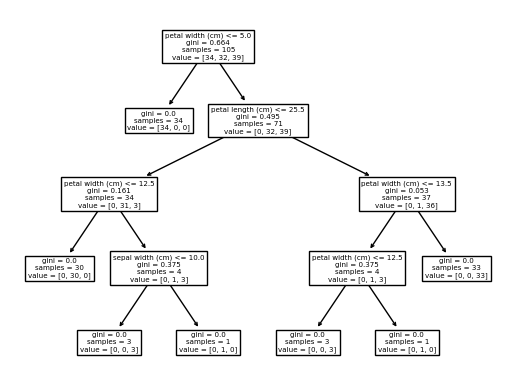

In [62]:
from sklearn.tree import plot_tree
plot_tree(classifier, feature_names = cols)

In [63]:
importance = pd.DataFrame({'features':cols, 'importance': classifier.feature_importances_})
importance

,features,importance
0,sepal length (cm),0.000000
1,sepal width (cm),0.021505
2,petal length (cm),0.397670
3,petal width (cm),0.580826


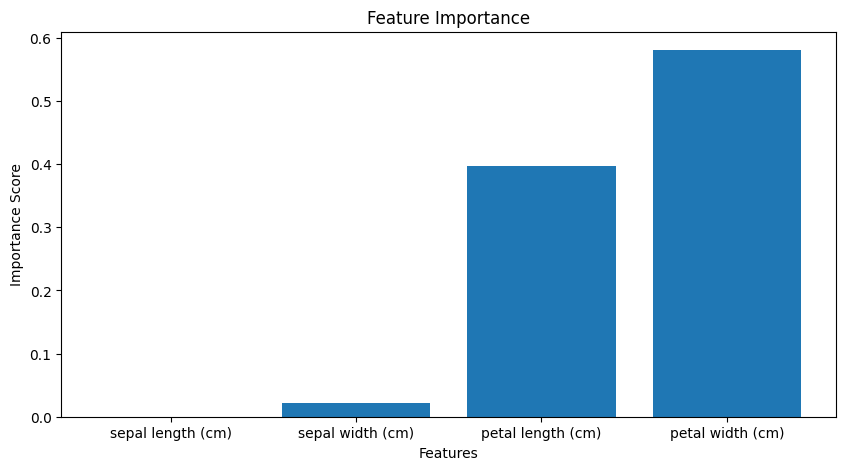

In [64]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,5))
plt.bar(x = cols, height = classifier.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [85]:
cols = df.columns.to_list()
cols.remove('sepal width (cm)')
cols

['sepal length (cm)', 'petal length (cm)', 'petal width (cm)', 'target']

In [84]:
features = df_clean[cols]
response = df_clean['target']

[Text(0.4, 0.9, 'target <= 5.0\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'petal width (cm) <= 25.5\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'target <= 12.5\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'petal length (cm) <= 10.0\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'target <= 13.5\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'target <= 12.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

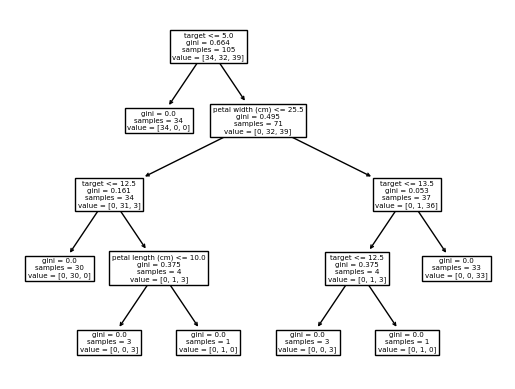

In [83]:
from sklearn.tree import plot_tree
plot_tree(classifier, feature_names = cols)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(response_test, predictions)

0.9777777777777777